In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [ ]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR = 'FashionMNISTDir'
    self.EPOCH = 10
    self.BATCH_SIZE = 32
    self.LEARNING_RATE = 0.01
    self.IMAGE_SIZE = (28,28)
    self.DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"this notebook is using device: {self.DEVICE}")
    self.SEED = 2022

config = Config()

# it will show cuda when u will connect to runtime gpu

this notebook is using device: cuda


In [ ]:
train_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
given_label_map=train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
label_map={val: key for key , val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

Visualize one of the samples

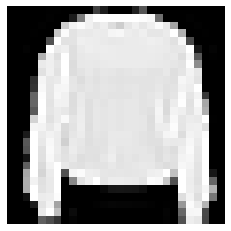

In [ ]:
def view_sample_img(data, idx, label_map):
  plt.imshow(data.data[idx], cmap = 'gray')
  plt.axis('off')

view_sample_img(train_data, 7, label_map)

Create the dataloader

In [ ]:
train_data_loader = DataLoader(
    dataset = train_data,
    batch_size  = config.BATCH_SIZE,
    shuffle= True
)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = config.BATCH_SIZE,
    shuffle = False
)

In [ ]:
for images, labels in train_data_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
images[0].shape

torch.Size([1, 28, 28])

In [ ]:
images[0].squeeze().shape

torch.Size([28, 28])

In [ ]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.1882353 ,
        0.54509807, 0.7921569 , 0.80784315, 0.8509804 , 0.84313726,
        0.8745098 , 0.8980392 , 0.7294118 , 0.35686275, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1764706 , 0.62352943, 0.8509804 , 0.93333334,
        0.8784314 , 0.8392157 , 0.8980392 , 0.92941177, 0.95686275,
        0.9490196 , 0.8117647 , 0.8156863 , 0.9137255 , 0.93333334,
        0.74509805, 0.34117648, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41568628, 0.84313726, 0.827451  , 0.7764706 , 0.7294118 ,
        0.74509805, 0.7411765 , 0.7411765 , 0.74509805, 0.74509805,
        0.70980394, 0.7176

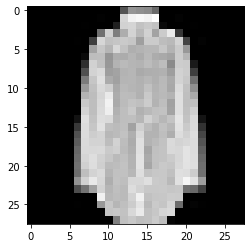

In [ ]:
plt.imshow(images[1].squeeze(), cmap = 'gray')

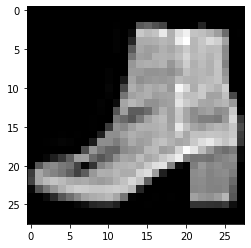

In [ ]:
plt.imshow(images[4].squeeze(), cmap = 'gray')

In [ ]:
images[4].shape, images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [ ]:
images[0][0].shape

torch.Size([28, 28])

In [ ]:
images[0].squeeze()

tensor([[0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.1882, 0.5451, 0.7922, 0.8078, 0.8510, 0.8431, 0.8745, 0.8980, 0.7294,
         0.3569, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1765, 0.6235, 0.8510,
         0.9333, 0.8784, 0.8392, 0.8980, 0.9294, 0.9569, 0.9490, 0.8118, 0.8157,
         0.9137, 0.9333, 0.7451, 0.3412, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4157, 0.8431, 0.8275, 0.7765,
         0.7294, 0.7451, 0.7412, 0.7412, 0.7451, 0.7451, 0.7098, 0.7176, 0.7529,
         0.7216, 0.7569, 0.7922, 0.8588, 0.6549, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.7569, 0.7608, 0.7412, 0.7412,
         0.7686, 0.7490, 0.7608, 0.7686, 0.7451, 0.7451, 0.7490, 0.7647, 0.7569,
         0.7529, 0.7412, 0.7333, 0.7333, 0.8157, 0.3216

In [ ]:
images[0].unsqueeze(dim=1)

tensor([[[[0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.1882, 0.5451, 0.7922, 0.8078, 0.8510, 0.8431, 0.8745,
           0.8980, 0.7294, 0.3569, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0039, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1765, 0.6235,
           0.8510, 0.9333, 0.8784, 0.8392, 0.8980, 0.9294, 0.9569, 0.9490,
           0.8118, 0.8157, 0.9137, 0.9333, 0.7451, 0.3412, 0.0000, 0.0000,
           0.0039, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4157, 0.8431, 0.8275,
           0.7765, 0.7294, 0.7451, 0.7412, 0.7412, 0.7451, 0.7451, 0.7098,
           0.7176, 0.7529, 0.7216, 0.7569, 0.7922, 0.8588, 0.6549, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.7569, 0.7608, 0.7412,
           0.7412, 0.7686, 0.7490, 0.7608, 0.7686, 0.7451, 0.7451, 0.7490,
           0.7647, 0.7569, 0.7529, 0.7412, 

In [33]:
class CNN(nn.Module):
  def __init__(self, in_, out_):
    super(CNN, self).__init__()

    self.conv_pool_01 = nn.Sequential(
        nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_pool_02 = nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding  =0)
    )

    self.Flatten = nn.Flatten()
    self.FC_01 = nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02 = nn.Linear(in_features=128, out_features=64)
    self.FC_03 = nn.Linear(in_features=64, out_features=out_)

  def forward(self, x):
    x = self.conv_pool_01(x)
    x = self.conv_pool_02(x)
    x = self.Flatten(x)
    x = self.FC_01(x)
    x = F.relu(x)
    x = self.FC_02(x)
    x = F.relu(x)    
    x = self.FC_03(x)
    return x

In [34]:
model = CNN(1,10)
print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [35]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
)

In [36]:
next(model.parameters()).is_cuda

False

In [37]:
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [38]:
next(model.parameters()).is_cuda

True